In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

### Read Data

In [5]:
data = pd.read_csv('C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Elon_musk.csv',encoding="latin-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


### Number of Words

In [6]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


### Number of Characters

In [7]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


### Average Word Length

In [8]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


### Number of stopwords

In [9]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


### Number of Special Characters

In [10]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


### Number of Numerics

In [11]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


### Number of Upper Case Words

In [12]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


### Pre - Processing

#### Lower Case

In [13]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

### Removing Punctuation

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

### Removal of Stop Words

In [16]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

### Common word removal

In [17]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [18]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Rare Words Removal

In [19]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [20]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Spelling correction

In [21]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Tokenization

In [22]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Stemming

In [24]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

### Lemmatization

In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
from textblob import Word

In [27]:
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.corpus.wordnet.synsets("test")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[Synset('trial.n.02'),
 Synset('test.n.02'),
 Synset('examination.n.02'),
 Synset('test.n.04'),
 Synset('test.n.05'),
 Synset('test.n.06'),
 Synset('test.v.01'),
 Synset('screen.v.01'),
 Synset('quiz.v.01'),
 Synset('test.v.04'),
 Synset('test.v.05'),
 Synset('test.v.06'),
 Synset('test.v.07')]

In [28]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

### Advanced Text Processing

#### N-grams

In [29]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

### Term frequency

In [30]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


### Inverse Document Frequency

In [31]:
for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))
tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


### Term Frequency – Inverse Document Frequency (TF-IDF)

In [32]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

### Bag of Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

### Sentiment Analysis

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
get_ipython().run_line_magic('matplotlib', 'inline')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1999 non-null   int64  
 1   Text        1999 non-null   object 
 2   word_count  1999 non-null   int64  
 3   char_count  1999 non-null   int64  
 4   avg_word    1999 non-null   float64
 5   stopwords   1999 non-null   int64  
 6   hastags     1999 non-null   int64  
 7   numerics    1999 non-null   int64  
 8   upper       1999 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 140.7+ KB


In [37]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ", text)
    text = re.sub('[''""...]', '',text)
    return text
clean = lambda x: clean_text(x)

In [38]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                                im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                              joerogan spotify interview
3                                     doge underestimated
4       teslacn congratulation china amazing execution...
                              ...                        
1994    true sound surreal negative propaganda still e...
1995     make sure read ur term condition clicking accept
1996                             teslagong samwise gamgee
1997                                         dumb dumber 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [39]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20]
freq

wholemarsblog      68
teslarati          59
launch             56
nasaspaceflight    55
haha               55
good               52
year               48
sure               43
yeah               41
make               41
dragon             41
need               40
cleantechnica      40
would              40
much               40
one                39
first              39
day                38
like               38
time               36
dtype: int64

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [41]:
def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
data['Subjectivity'] = data.Text.apply(calc_subj)
data['Polarity'] = data.Text.apply(calc_pola)
1
2
data.head(10)

,Unnamed: 0,Text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,text,Subjectivity,Polarity
0,1,im alien,4,22,4.750000,1,1,0,0,im alien,0.750000,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,13,82,5.384615,4,1,0,1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,3,joerogan spotify interview,4,35,8.000000,0,2,0,0,joerogan spotify interview,0.000000,0.000000
3,4,doge underestimated,4,31,7.000000,1,1,0,0,doge underestimated,0.000000,0.000000
4,5,teslacn congratulation china amazing execution...,17,104,5.176471,5,1,0,0,teslacn congratulation china amazing execution...,0.322222,0.200000
5,6,happy new year ox,7,49,6.142857,2,0,0,0,happy new year ox,0.727273,0.468182
6,7,frodo underdoge thought would fail httpstcozgx...,12,96,5.928571,5,0,0,0,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,8,owensparks haha thanks,6,46,6.833333,0,3,0,0,owensparks haha thanks,0.250000,0.200000
8,9,indeed tweet definitely represent realworld t...,11,89,7.181818,2,2,0,0,indeed tweet definitely represent realworld ti...,0.500000,0.000000
9,10,entertaining outcome likely,8,48,5.125000,4,0,0,0,entertaining outcome likely,0.850000,0.250000


In [42]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data['Sentiment'] = data.Polarity.apply(sentiment)
1
data.head(10)

,Unnamed: 0,Text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,text,Subjectivity,Polarity,Sentiment
0,1,im alien,4,22,4.750000,1,1,0,0,im alien,0.750000,-0.250000,Negative
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,13,82,5.384615,4,1,0,1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Netural
2,3,joerogan spotify interview,4,35,8.000000,0,2,0,0,joerogan spotify interview,0.000000,0.000000,Netural
3,4,doge underestimated,4,31,7.000000,1,1,0,0,doge underestimated,0.000000,0.000000,Netural
4,5,teslacn congratulation china amazing execution...,17,104,5.176471,5,1,0,0,teslacn congratulation china amazing execution...,0.322222,0.200000,Positive
5,6,happy new year ox,7,49,6.142857,2,0,0,0,happy new year ox,0.727273,0.468182,Positive
6,7,frodo underdoge thought would fail httpstcozgx...,12,96,5.928571,5,0,0,0,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000,Negative
7,8,owensparks haha thanks,6,46,6.833333,0,3,0,0,owensparks haha thanks,0.250000,0.200000,Positive
8,9,indeed tweet definitely represent realworld t...,11,89,7.181818,2,2,0,0,indeed tweet definitely represent realworld ti...,0.500000,0.000000,Netural
9,10,entertaining outcome likely,8,48,5.125000,4,0,0,0,entertaining outcome likely,0.850000,0.250000,Positive


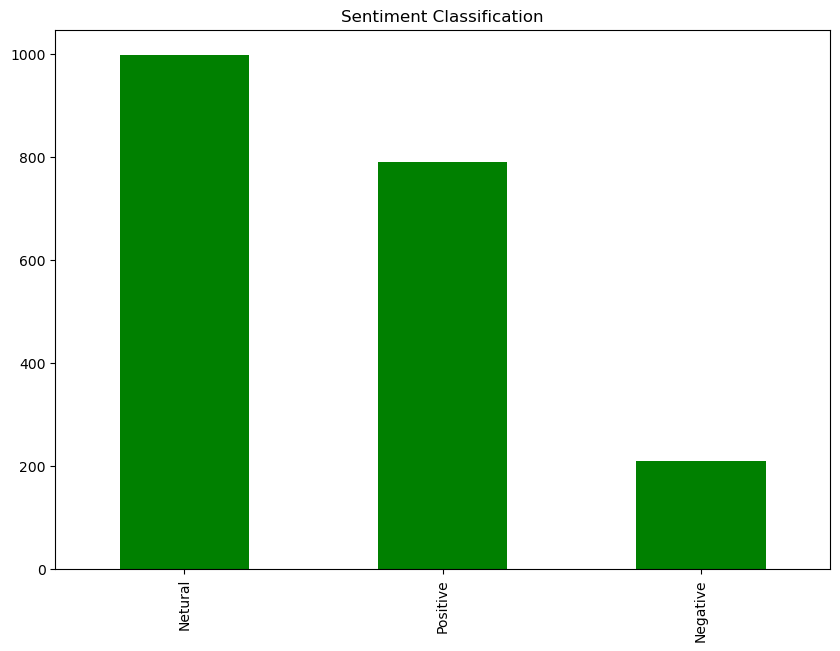

In [43]:
fig=plt.figure(figsize=(10,7))
data.Sentiment.value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

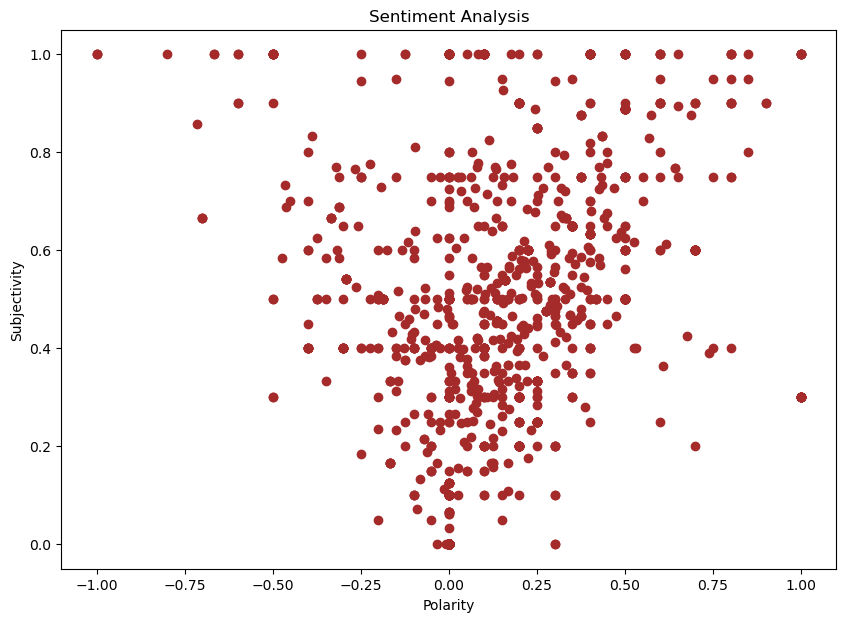

In [44]:
fig=plt.figure(figsize=(10,7))
plt.scatter(data.Polarity, data.Subjectivity, color='brown')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [45]:
Data_sentiment = pd.DataFrame(data.Sentiment.value_counts(normalize=True)*100)
 
Data_sentiment['Total'] = data.Sentiment.value_counts()

Data_sentiment

,Sentiment,Total
Netural,49.924962,998
Positive,39.569785,791
Negative,10.505253,210


In [46]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [47]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify interview,0.00
3,doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


### Perform emotion mining

#### Read Data

In [48]:
! pip install future

In [49]:
pip install -U future 

Note: you may need to restart the kernel to use updated packages.


In [50]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [51]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords

In [54]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/positive-words.txt", "r", encoding = "ISO-8859-1") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [56]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [57]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [58]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [59]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [62]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [63]:
!pip3 install beautifulsoup4

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [65]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [66]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [67]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [68]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [69]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [70]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [71]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Simply Awesome,Got it a few weeks ago and reviewing it now......,3 December 2022
1,4.0,Disappointed.,This is my first 1+ mobile but frankly this is...,2 December 2022
2,4.0,"The camera quality could be a bit better, and ...","after 4 months of usage, the mobile is very go...",29 November 2022
3,4.0,"Product is good , delivery experience bad.",The delivery executive was really rude. He did...,1 December 2022
4,4.0,Is it worth to buy?,Overall a fine product to use but as per funct...,30 November 2022
...,...,...,...,...
4995,5.0,Best phone in this price,Good budget branded phone.. charger is superb ...,1 July 2022
4996,5.0,I love oneplus phone best phone,Love this phone best phone of the year love to...,17 July 2022
4997,5.0,Nice,Very nice camera,1 August 2022
4998,5.0,Nice phone,Nice phone,3 August 2022


In [72]:
df.to_csv("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Amazon_Reviews_Oneplus_Nord_CE2.csv")


In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [75]:
# load the dataset
reviews=pd.read_csv('C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Simply Awesome,Got it a few weeks ago and reviewing it now......,3 December 2022
1,4.0,Disappointed.,This is my first 1+ mobile but frankly this is...,2 December 2022
2,4.0,"The camera quality could be a bit better, and ...","after 4 months of usage, the mobile is very go...",29 November 2022
3,4.0,"Product is good , delivery experience bad.",The delivery executive was really rude. He did...,1 December 2022
4,4.0,Is it worth to buy?,Overall a fine product to use but as per funct...,30 November 2022
...,...,...,...,...
4995,5.0,Best phone in this price,Good budget branded phone.. charger is superb ...,1 July 2022
4996,5.0,I love oneplus phone best phone,Love this phone best phone of the year love to...,17 July 2022
4997,5.0,Nice,Very nice camera,1 August 2022
4998,5.0,Nice phone,Nice phone,3 August 2022


### Data Exploration

In [76]:
reviews.Rating.describe()

count    5000.00000
mean        4.27440
std         0.75975
min         1.00000
25%         4.00000
50%         4.00000
75%         5.00000
max         5.00000
Name: Rating, dtype: float64

In [77]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Got it a few weeks ago and reviewing it now......,86
1,This is my first 1+ mobile but frankly this is...,70
2,"after 4 months of usage, the mobile is very go...",82
3,The delivery executive was really rude. He did...,35
4,Overall a fine product to use but as per funct...,28


### Number of characters

In [78]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Got it a few weeks ago and reviewing it now......,480.0
1,This is my first 1+ mobile but frankly this is...,381.0
2,"after 4 months of usage, the mobile is very go...",431.0
3,The delivery executive was really rude. He did...,209.0
4,Overall a fine product to use but as per funct...,164.0


### Average Word Length

In [79]:
def avg_word(sentence):
    words = str(sentence).split()
    return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Got it a few weeks ago and reviewing it now......,4.593023
1,This is my first 1+ mobile but frankly this is...,4.457143
2,"after 4 months of usage, the mobile is very go...",4.268293
3,The delivery executive was really rude. He did...,5.000000
4,Overall a fine product to use but as per funct...,4.892857


### Number of stopwords

In [80]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Got it a few weeks ago and reviewing it now......,30
1,This is my first 1+ mobile but frankly this is...,29
2,"after 4 months of usage, the mobile is very go...",37
3,The delivery executive was really rude. He did...,15
4,Overall a fine product to use but as per funct...,11


### Number of special characters

In [81]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Got it a few weeks ago and reviewing it now......,0
1,This is my first 1+ mobile but frankly this is...,0
2,"after 4 months of usage, the mobile is very go...",0
3,The delivery executive was really rude. He did...,0
4,Overall a fine product to use but as per funct...,0


### Number of numerics

In [82]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Got it a few weeks ago and reviewing it now......,2
1,This is my first 1+ mobile but frankly this is...,0
2,"after 4 months of usage, the mobile is very go...",1
3,The delivery executive was really rude. He did...,0
4,Overall a fine product to use but as per funct...,0


### Number of Uppercase words

In [83]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Got it a few weeks ago and reviewing it now......,0
1,This is my first 1+ mobile but frankly this is...,2
2,"after 4 months of usage, the mobile is very go...",3
3,The delivery executive was really rude. He did...,0
4,Overall a fine product to use but as per funct...,0


In [84]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [85]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Not it a few weeks ago and reviewing it now......
1    His is my first 1+ mobile but frankly this is ...
2    after 4 months of usage, the mobile is very go...
3    The delivery executive was really rude. He did...
4    Overall a fine product to use but as per funct...
Name: Review, dtype: object

### Feature Engineering

In [86]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0        3
1        2
2       29
3        1
4       30
        ..
4995     1
4996    17
4997     1
4998     3
4999    24
Name: Review_Date, Length: 5000, dtype: object 
 0       December
1       December
2       November
3       December
4       November
          ...   
4995        July
4996        July
4997      August
4998      August
4999     October
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [87]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,3,December,2022
1,2,December,2022
2,29,November,2022
3,1,December,2022
4,30,November,2022
...,...,...,...
4995,1,July,2022
4996,17,July,2022
4997,1,August,2022
4998,3,August,2022


In [88]:
df.Month.value_counts()

in           2500
August        503
October       420
November      407
September     392
July          265
June          155
May           155
April          96
March          69
December       24
February       14
Name: Month, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4741 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   object 
 6   Year         5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


### Dropping the Original Columns after splitting the data

In [91]:
df.drop('Review_Date',axis=1, inplace=True)
df.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,Simply Awesome,Got it a few weeks ago and reviewing it now......,3,December,2022
1,4.0,Disappointed.,This is my first 1+ mobile but frankly this is...,2,December,2022
2,4.0,"The camera quality could be a bit better, and ...","after 4 months of usage, the mobile is very go...",29,November,2022
3,4.0,"Product is good , delivery experience bad.",The delivery executive was really rude. He did...,1,December,2022
4,4.0,Is it worth to buy?,Overall a fine product to use but as per funct...,30,November,2022


In [92]:
df

,Rating,Title,Review,Date,Month,Year
0,4.0,Simply Awesome,Got it a few weeks ago and reviewing it now......,3,December,2022
1,4.0,Disappointed.,This is my first 1+ mobile but frankly this is...,2,December,2022
2,4.0,"The camera quality could be a bit better, and ...","after 4 months of usage, the mobile is very go...",29,November,2022
3,4.0,"Product is good , delivery experience bad.",The delivery executive was really rude. He did...,1,December,2022
4,4.0,Is it worth to buy?,Overall a fine product to use but as per funct...,30,November,2022
...,...,...,...,...,...,...
4995,5.0,Best phone in this price,Good budget branded phone.. charger is superb ...,1,July,2022
4996,5.0,I love oneplus phone best phone,Love this phone best phone of the year love to...,17,July,2022
4997,5.0,Nice,Very nice camera,1,August,2022
4998,5.0,Nice phone,Nice phone,3,August,2022


### Data Visualization

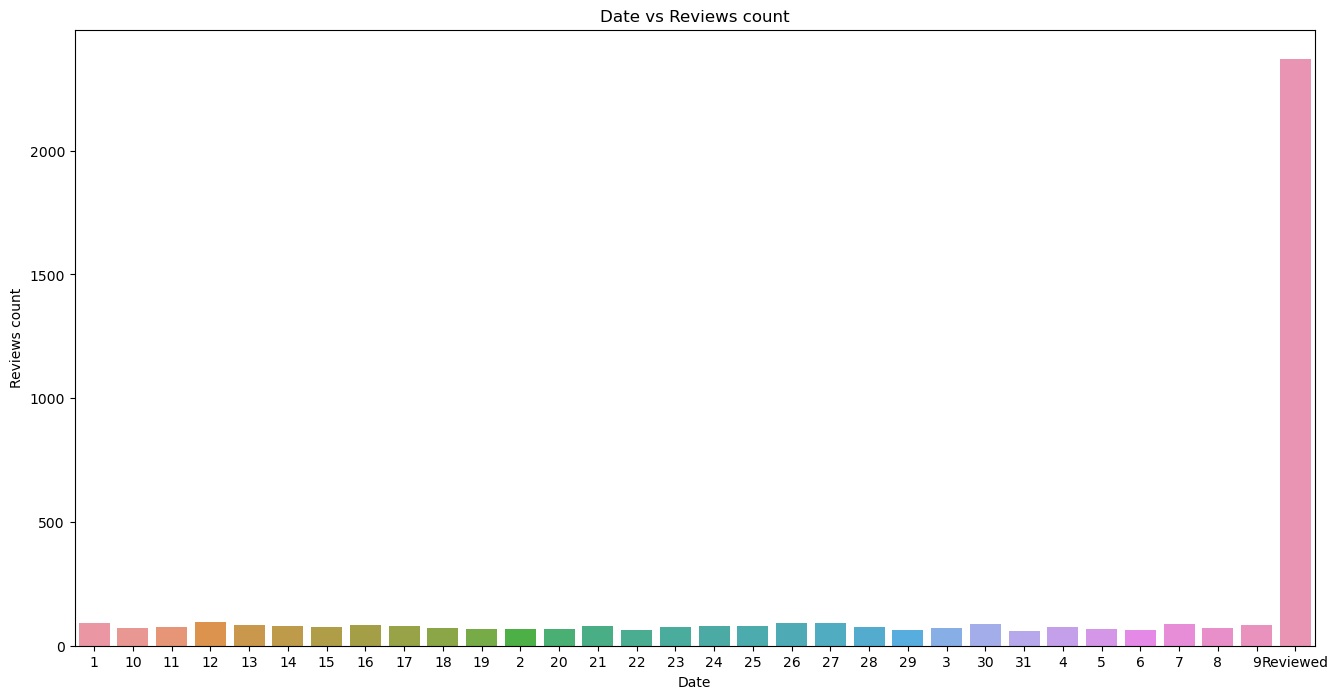

In [93]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

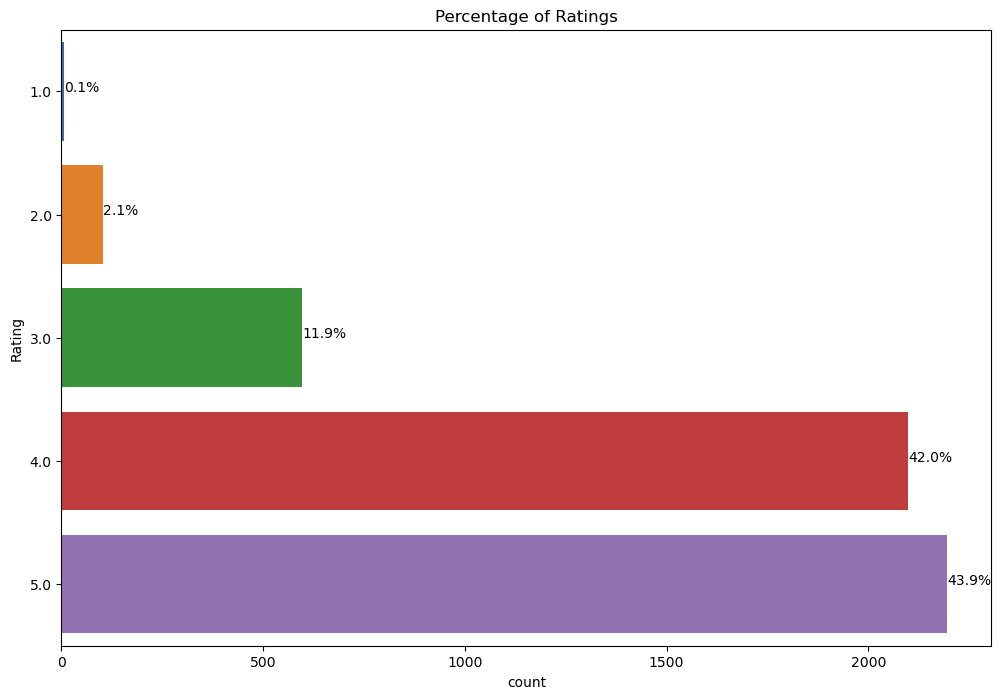

In [94]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

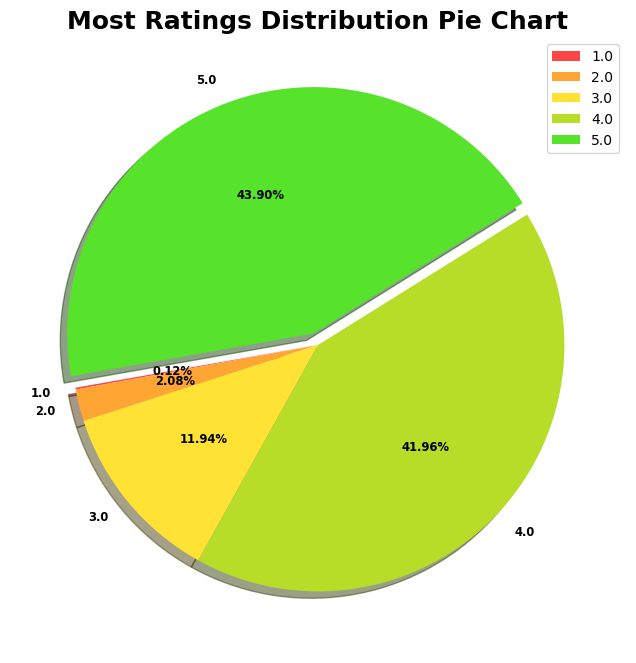

In [95]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### BasicText Preprocessing

### For Sentiment Analysis

In [96]:
data = df[['Review']]
data

,Review
0,Got it a few weeks ago and reviewing it now......
1,This is my first 1+ mobile but frankly this is...
2,"after 4 months of usage, the mobile is very go..."
3,The delivery executive was really rude. He did...
4,Overall a fine product to use but as per funct...
...,...
4995,Good budget branded phone.. charger is superb ...
4996,Love this phone best phone of the year love to...
4997,Very nice camera
4998,Nice phone


In [97]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [98]:
data

,Review
0,got weeks ago reviewing now...it's great phone...
1,this first 1+ mobile frankly worthy i think. b...
2,"4 months usage, mobile good terms stability ma..."
3,the delivery executive really rude. he even kn...
4,overall fine product use per functionality pri...
...,...
4995,good budget branded phone.. charger superb 33v...
4996,love phone best phone year love see
4997,very nice camera
4998,nice phone


In [99]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [100]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...


### Removing links (http | https)

In [101]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


### Removing Review with empty text

In [102]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


### Dropping duplicate rows

In [103]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


### Resetting index

In [104]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


### Removing Punctuations, Numbers and Special characters

In [105]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [106]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


### Function to remove emoji

In [107]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [108]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...


In [109]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,got week ago reviewing great phone kcamera awe...,Got it a few weeks ago and reviewing it now......,"[got, week, ago, reviewing, great, phone, kcam..."
1,first mobile frankly worthy think battery also...,This is my first 1+ mobile but frankly this is...,"[first, mobile, frankly, worthy, think, batter..."
2,month usage mobile good term stability managin...,"after 4 months of usage, the mobile is very go...","[month, usage, mobile, good, term, stability, ..."
3,delivery executive really rude even know proce...,The delivery executive was really rude. He did...,"[delivery, executive, really, rude, even, know..."
4,overall fine product use per functionality pri...,Overall a fine product to use but as per funct...,"[overall, fine, product, use, per, functionali..."
5,battery charging speed amazing w vooc charger ...,Battery charging speed is amazing with 65W VOO...,"[battery, charging, speed, amazing, w, vooc, c..."
6,must buy phone ur using one plus first time ge...,Must buy phone if ur using one plus for the ve...,"[must, buy, phone, ur, using, one, plus, first..."
7,product good battery camera quality good spend...,"Product Good, but battery and camera quality i...","[product, good, battery, camera, quality, good..."
8,feature performance good battery backup poor m...,All the Features and Performance are Good but ...,"[feature, performance, good, battery, backup, ..."
9,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...,"[searching, smartphone, k, segment, checked, l..."
